#1 Import Library & Load Dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

file_path = '/content/sample_data/ai4i2020.csv'
data = pd.read_csv(file_path)

print(data.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

#2 Data Preprocessing

In [5]:
# Menghapus data yang hilang
data.dropna(inplace=True)

# Memilih fitur (independen variabel) dan target (dependen variabel)
features = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
target = data['TWF']

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

#3 Exploratory Data Analysis

In [6]:
# Select only numerical columns for EDA and outlier handling
numerical_data = data.select_dtypes(include=['float64', 'int64'])

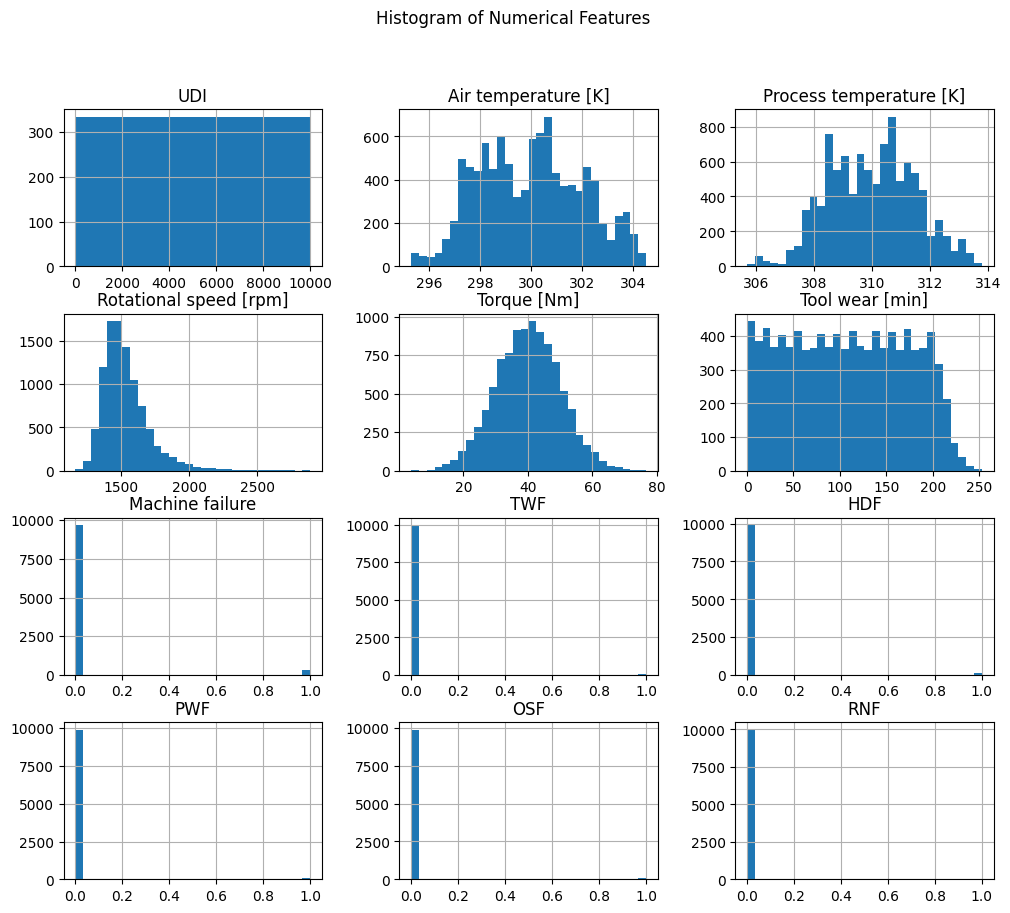

In [7]:
# Histogram of all numerical columns
numerical_data.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histogram of Numerical Features')
plt.show()

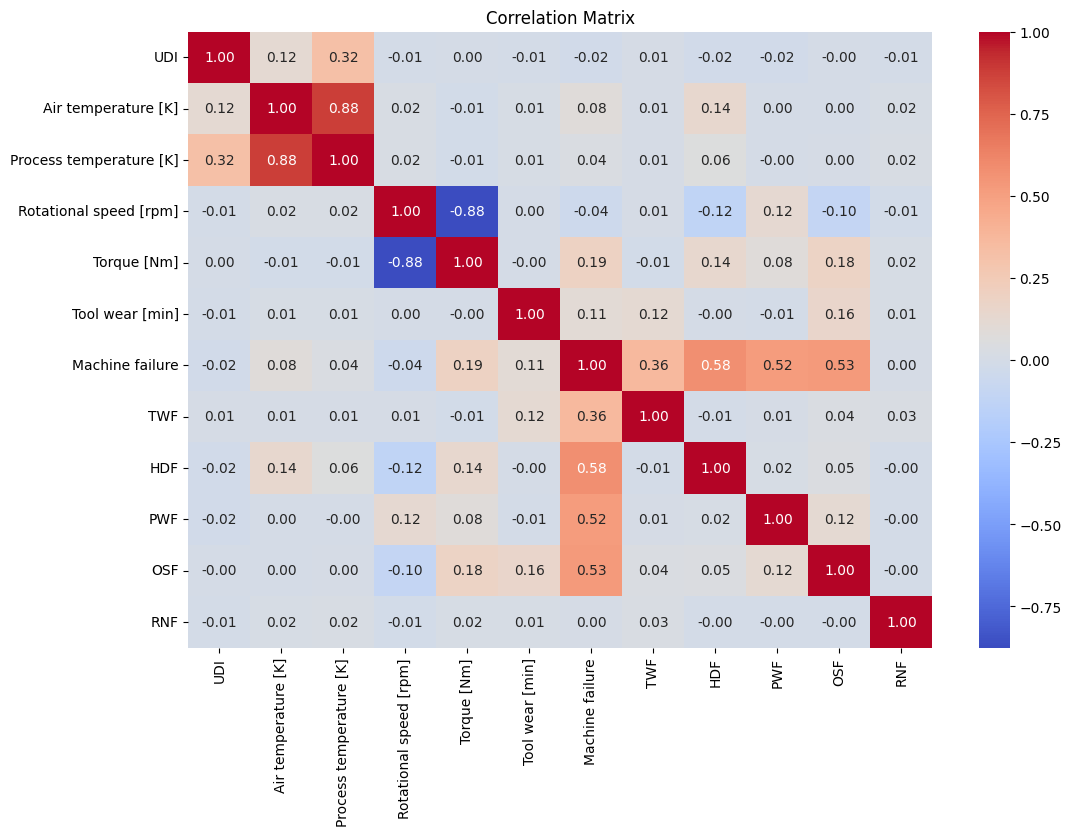

In [5]:
# Correlation Matrix
correlation_matrix = numerical_data.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

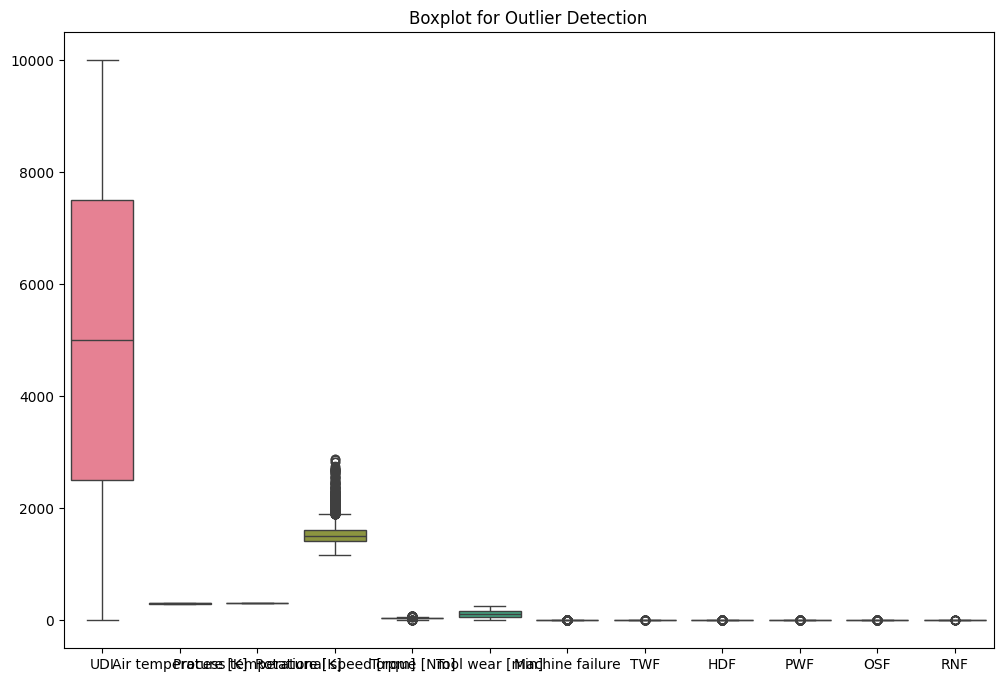

In [6]:
# Boxplot untuk deteksi outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Boxplot for Outlier Detection')
plt.show()

In [6]:
# Menghitung IQR dan Menghapus Outlier
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
filtered_data = numerical_data[~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]

Tidak menghapus outlier karena berpengaruh pada pengembangan model berikutnya dimana ada error karena data target y_train hanya memiliki satu kelas, yaitu 0 ketika sudah dihapus outliernya, yang mana Model Logistic Regression dan juga Random Forest membutuhkan setidaknya dua kelas untuk pelatihan, agar dapat belajar membedakan antar kategori yang berbeda

#4 Model Development

In [20]:
# Pemilihan Fitur dan Target
features = numerical_data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
target = data.loc[numerical_data.index, 'TWF']

# Pembagian Data Train dan Test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [21]:
# Model 1: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Model 2: Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Prediksi dan Evaluasi Model
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

logistic_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'Precision': precision_score(y_test, y_pred_logistic),
    'Recall': recall_score(y_test, y_pred_logistic),
    'F1 Score': f1_score(y_test, y_pred_logistic),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_logistic),
    'Classification Report': classification_report(y_test, y_pred_logistic)
}

rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf),
    'Classification Report': classification_report(y_test, y_pred_rf)
}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

In [11]:
# Hyperparameter Tuning untuk Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Model Random Forest terbaik dari Grid Search
best_rf_model = grid_search.best_estimator_

# Evaluasi model terbaik
y_pred_best_rf = best_rf_model.predict(X_test)

best_rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_best_rf),
    'Precision': precision_score(y_test, y_pred_best_rf),
    'Recall': recall_score(y_test, y_pred_best_rf),
    'F1 Score': f1_score(y_test, y_pred_best_rf),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_best_rf),
    'Classification Report': classification_report(y_test, y_pred_best_rf)
}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

Tuning tidak dilakukan pada Logistic Regression karena model ini umumnya sederhana dan memiliki sedikit parameter yang dapat diatur, sehingga tidak memerlukan tuning ekstensif seperti pada Random Forest.

#5 Evaluasi Model

In [13]:
# Membuat DataFrame untuk metrik evaluasi model
metrik_evaluasi = {
    'Model': ['Logistic Regression', 'Random Forest', 'Best Random Forest'],
    'Akurasi': [logistic_metrics['Accuracy'], rf_metrics['Accuracy'], best_rf_metrics['Accuracy']],
    'Presisi': [logistic_metrics['Precision'], rf_metrics['Precision'], best_rf_metrics['Precision']],
    'Recall': [logistic_metrics['Recall'], rf_metrics['Recall'], best_rf_metrics['Recall']],
    'Skor F1': [logistic_metrics['F1 Score'], rf_metrics['F1 Score'], best_rf_metrics['F1 Score']],
}

# Mengonversi dictionary menjadi DataFrame
tabel_evaluasi = pd.DataFrame(metrik_evaluasi)

# Menampilkan tabel evaluasi
print(tabel_evaluasi)


                 Model  Akurasi  Presisi  Recall  Skor F1
0  Logistic Regression   0.9940      0.0     0.0      0.0
1        Random Forest   0.9945      0.0     0.0      0.0
2   Best Random Forest   0.9945      0.0     0.0      0.0


Menurut saya berdasarkan hasil maka random forest yang lebih baik meskipun berselisih sedikit dengan tingkat akurasi logistic regression namun karena angkanya begitu tinggi sementara matriks lainnya bernilai nol, setelah diperiksa ternyata kolom target TWF memiliki data bernilai nol semua, ini berarti tidak ada data kegagalan dalam dataset ini. Hal ini menyebabkan tidak mungkin untuk membangun model prediksi yang berguna. Semua kolom kegagalan (Machine failure, TWF, HDF, PWF, OSF, RNF) memiliki nilai 0.